In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_excel('data.xlsx')

In [4]:
data_restore = data.copy()

In [5]:
data.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


In [6]:
data.columns

Index(['Distributor', 'Customer Name', 'City', 'Country', 'Latitude',
       'Longitude', 'Channel', 'Sub-channel', 'Product Name', 'Product Class',
       'Quantity', 'Price', 'Sales', 'Month', 'Year', 'Name of Sales Rep',
       'Manager', 'Sales Team'],
      dtype='object')

In [7]:
data.drop(columns=['Customer Name', 'Channel', 'Sub-channel', 'Product Name', 'Price', 'Sales', 'Name of Sales Rep',
       'Manager', 'Sales Team', "Distributor"], inplace=True)

In [8]:
data.head()

,City,Country,Latitude,Longitude,Product Class,Quantity,Month,Year
0,Lublin,Poland,51.2333,22.5667,Mood Stabilizers,4.0,January,2018
1,Świecie,Poland,53.4167,18.4333,Antibiotics,7.0,January,2018
2,Rybnik,Poland,50.0833,18.5000,Antibiotics,30.0,January,2018
3,Czeladź,Poland,50.3333,19.0833,Analgesics,6.0,January,2018
4,Olsztyn,Poland,53.7800,20.4942,Analgesics,20.0,January,2018


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           254082 non-null  object 
 1   Country        254082 non-null  object 
 2   Latitude       254082 non-null  float64
 3   Longitude      254082 non-null  float64
 4   Product Class  254082 non-null  object 
 5   Quantity       254082 non-null  float64
 6   Month          254082 non-null  object 
 7   Year           254082 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 15.5+ MB


In [10]:
data.describe(include="object")

,City,Country,Product Class,Month
count,254082,254082,254082,254082
unique,749,2,6,12
top,Friedberg,Germany,Antiseptics,November
freq,796,213598,52037,23323


In [11]:
data.describe()

,Latitude,Longitude,Quantity,Year
count,254082.000000,254082.000000,254082.000000,254082.000000
mean,50.962222,10.803212,112.872139,2018.385187
std,1.625526,4.143311,744.310385,1.041352
min,47.514200,6.083800,-7200.000000,2017.000000
25%,49.805600,7.891100,5.000000,2018.000000
50%,51.133300,9.397800,20.000000,2018.000000
75%,52.083300,12.133300,50.000000,2019.000000
max,54.781900,23.566700,117600.000000,2020.000000


<Axes: ylabel='count'>

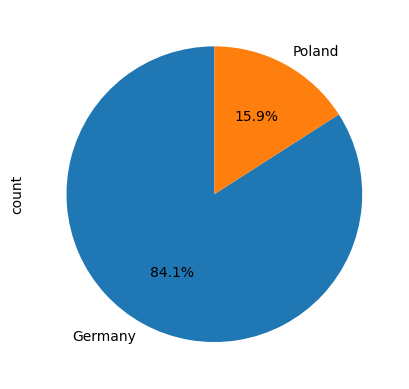

In [12]:
# pie chart of the data by country
data['Country'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)

<Axes: xlabel='Product Class'>

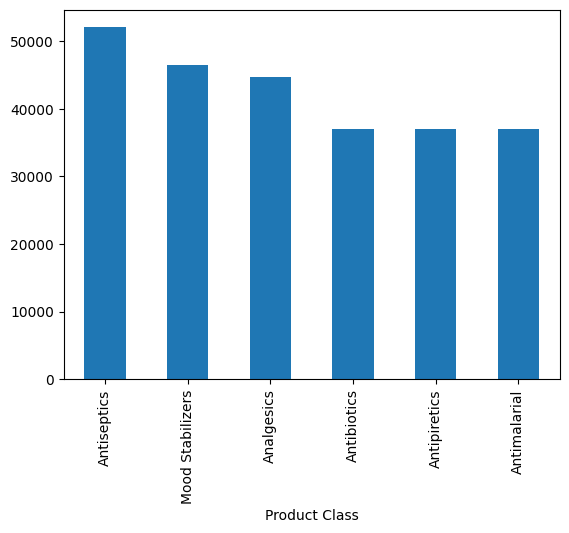

In [13]:
# bar chart of count of data by Customer name
data['Product Class'].value_counts().plot.bar()

In [14]:
# check for missing values
data.isnull().sum()

City             0
Country          0
Latitude         0
Longitude        0
Product Class    0
Quantity         0
Month            0
Year             0
dtype: int64

In [15]:
# drop rows where country == Poland
data = data[data['Country'] != 'Poland']

In [16]:
# apply abs on column Quantity
data['Quantity'] = data['Quantity'].abs()

In [17]:
data.describe()

,Latitude,Longitude,Quantity,Year
count,213598.000000,213598.000000,213598.000000,213598.000000
mean,50.802395,9.244820,129.770052,2018.458192
std,1.610495,2.041477,807.477037,1.120936
min,47.514200,6.083800,1.000000,2017.000000
25%,49.452800,7.565300,8.000000,2017.000000
50%,51.033300,8.797500,20.000000,2018.000000
75%,51.841700,10.686400,69.000000,2019.000000
max,54.781900,14.987200,117600.000000,2020.000000


In [18]:
# map string month to integer
data['Month'] = data['Month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                                   'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})

In [19]:
# create date column from year, month columns
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [20]:
# drop year, month columns
data.drop(columns=['Year', 'Month'], inplace=True)

In [21]:
# drop country
data.drop(columns=['Country'], inplace=True)

In [22]:
# group by city ptroduct class and date, then aggregate longutude and latitude by mean and quantity by sum
data = data.groupby(['City', 'Product Class', 'Date']).agg({'Longitude': 'mean', 'Latitude': 'mean', 'Quantity': 'sum'}).reset_index()

In [23]:
import tqdm
import warnings
warnings.filterwarnings("ignore")

In [24]:
dataframe_dict = {}
# iterate over each city
for city in data['City'].unique():
    # iterate over each product class
    for product_class in tqdm.tqdm(data['Product Class'].unique()):
        # get the data for the city and product class
        data_temp = data[(data['City'] == city) & (data['Product Class'] == product_class)]
        # create a dataframe for the city and product class
        dataframe = pd.DataFrame(data_temp)
        # sort the dataframe by date
        dataframe.sort_values(by='Date', inplace=True)
        # reset the index
        dataframe.reset_index(drop=True, inplace=True)
        # correct frequency of the data
        dataframe = dataframe.resample('M', on='Date').sum()
        # fill missing values with 0 in the quantity column
        dataframe['Quantity'].fillna(0, inplace=True)
        # save the longitude and latitude of the city in a couple
        for i in range(dataframe.shape[0]):
            city_location = (dataframe['Longitude'].iloc[i], dataframe['Latitude'].iloc[i])
            if city_location != (0, 0):
                break
        # drop the city and product class columns
        dataframe.drop(columns=['City', 'Product Class', 'Longitude', 'Latitude'], inplace=True)
        # append the dataframe to the dictionary
        dataframe_dict[f'{city}_{product_class}'] = (dataframe, city_location)

  0%|          | 0/6 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 91.85it/s]


In [25]:
dataframe_dict.keys()

dict_keys(['Aachen_Analgesics', 'Aachen_Antibiotics', 'Aachen_Antimalarial', 'Aachen_Antipiretics', 'Aachen_Antiseptics', 'Aachen_Mood Stabilizers', 'Aalen_Analgesics', 'Aalen_Antibiotics', 'Aalen_Antimalarial', 'Aalen_Antipiretics', 'Aalen_Antiseptics', 'Aalen_Mood Stabilizers', 'Achern_Analgesics', 'Achern_Antibiotics', 'Achern_Antimalarial', 'Achern_Antipiretics', 'Achern_Antiseptics', 'Achern_Mood Stabilizers', 'Achim_Analgesics', 'Achim_Antibiotics', 'Achim_Antimalarial', 'Achim_Antipiretics', 'Achim_Antiseptics', 'Achim_Mood Stabilizers', 'Ahaus_Analgesics', 'Ahaus_Antibiotics', 'Ahaus_Antimalarial', 'Ahaus_Antipiretics', 'Ahaus_Antiseptics', 'Ahaus_Mood Stabilizers', 'Ahlen_Analgesics', 'Ahlen_Antibiotics', 'Ahlen_Antimalarial', 'Ahlen_Antipiretics', 'Ahlen_Antiseptics', 'Ahlen_Mood Stabilizers', 'Ahrensburg_Analgesics', 'Ahrensburg_Antibiotics', 'Ahrensburg_Antimalarial', 'Ahrensburg_Antipiretics', 'Ahrensburg_Antiseptics', 'Ahrensburg_Mood Stabilizers', 'Aichach_Analgesics', '

In [26]:
dataframe_dict['Aachen_Analgesics'][0].shape[0] 

46

In [27]:
# extract unique city names and product classes
city_names = data['City'].unique()
product_classes = data['Product Class'].unique()

In [28]:
len(city_names), len(product_classes)

(549, 6)

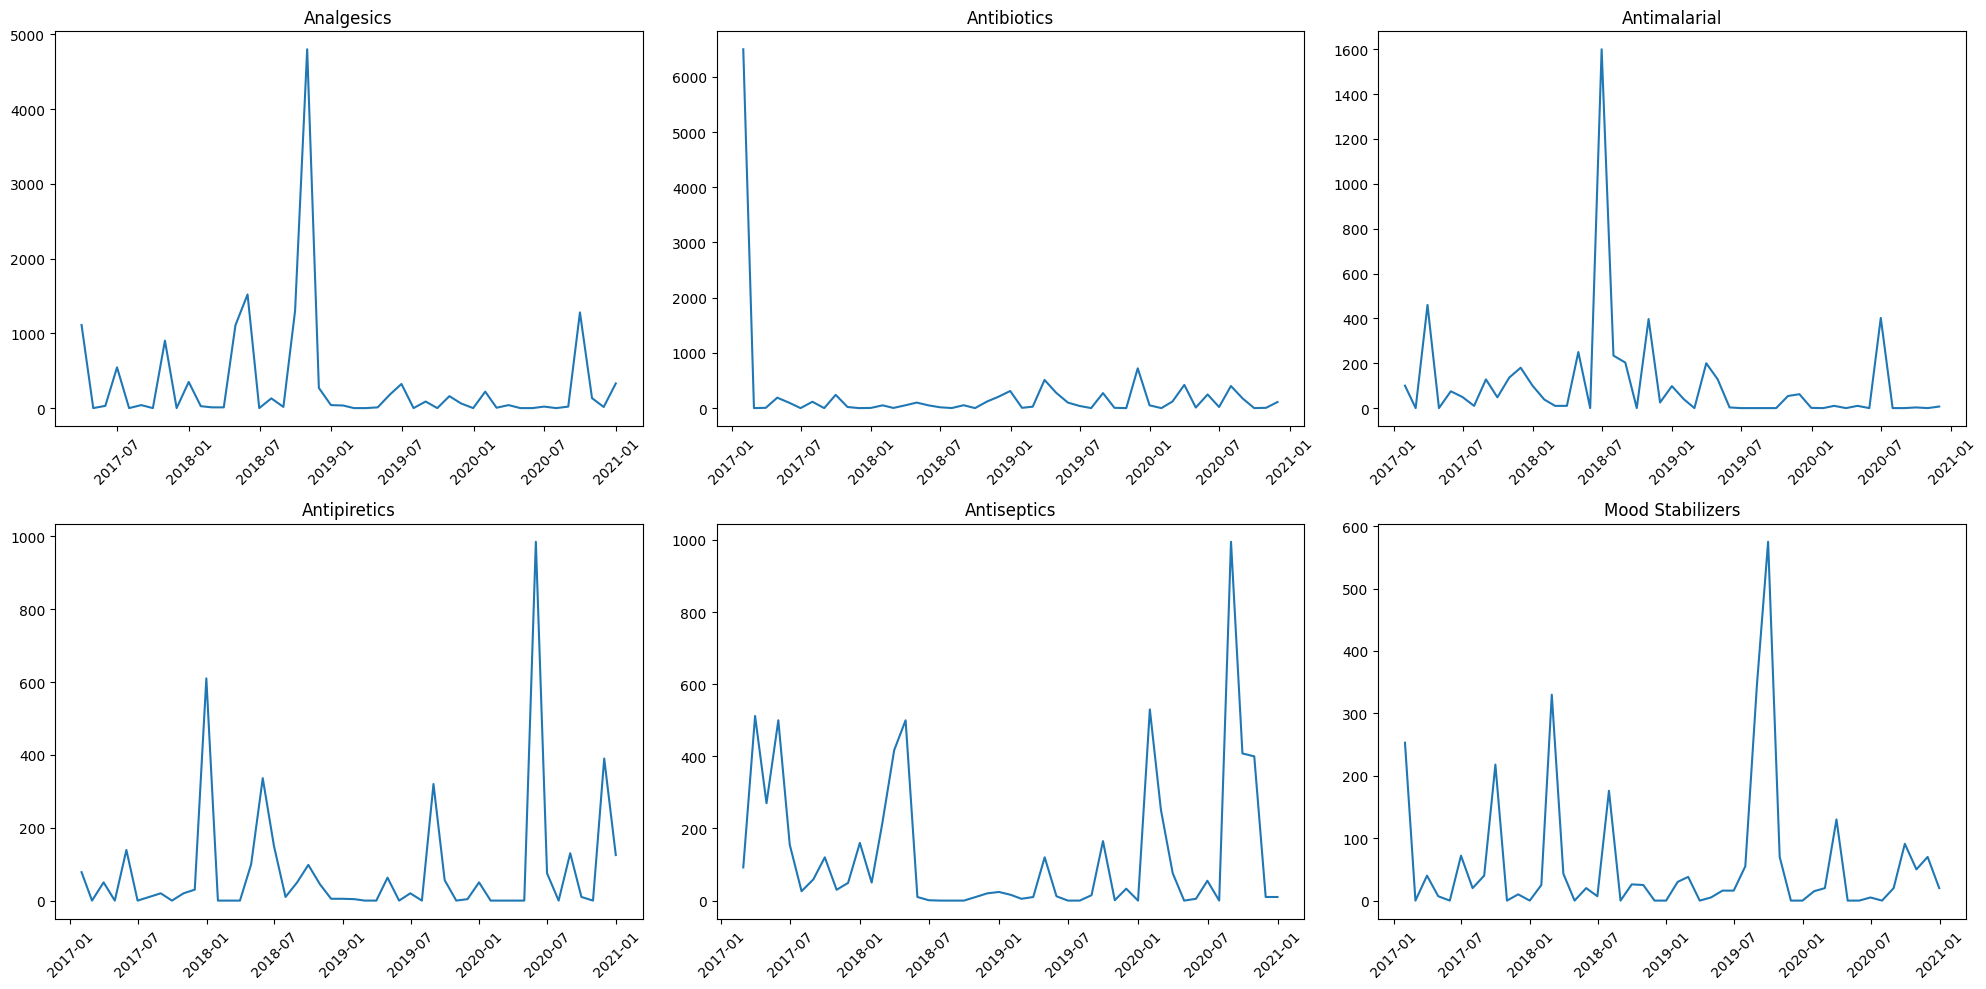

In [29]:
# plot the data for Aachen for every product class in a grid of 2x3
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, product_class in enumerate(product_classes):
    dataframe = dataframe_dict[f'{city_names[0]}_{product_class}'][0]
    axs[i // 3, i % 3].plot(dataframe['Quantity'])
    axs[i // 3, i % 3].set_title(product_class)
    # incline the x-axis labels
    axs[i // 3, i % 3].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [30]:
import pickle
# save the dictionary to a file
with open('dataframe_dict.pkl', 'wb') as f:
    pickle.dump(dataframe_dict, f)

# Model training: LSTM

In [31]:
# load the dictionary from a file
import pickle
with open('dataframe_dict.pkl', 'rb') as f:
    dataframe_dict = pickle.load(f)

In [32]:
# use torch for LSTM
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [34]:
# devide the data into train and test
train_data = {}
test_data = {}
for key, value in dataframe_dict.items():
    dataframe = value[0]
    train_data[key] = dataframe.iloc[:int(0.7 * dataframe.shape[0])]
    test_data[key] = dataframe.iloc[int(0.7 * dataframe.shape[0]):]

In [35]:
# create a dataset class for sequence data
class SequenceDataset(Dataset):
    def __init__(self, dataframe, sequence_length):
        self.dataframe = dataframe
        self.sequence_length = sequence_length
        # standardize the data
        self.mean = self.dataframe['Quantity'].mean()
        self.std = self.dataframe['Quantity'].std()

    def __len__(self):
        return self.dataframe.shape[0] - self.sequence_length

    def __getitem__(self, idx):
        return torch.tensor(self.dataframe['Quantity'].iloc[idx: idx + self.sequence_length].values).float()
    
    def normalize(self, value):
        return (value - self.mean) / self.std
    
    def denormalize(self, value):
        return value * self.std + self.mean
    
# create a dataloader for the dataset
def create_dataloader(dataframe, sequence_length, batch_size):
    dataset = SequenceDataset(dataframe, sequence_length)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return dataloader

# create a dataloader for the train data
sequence_length = 6
batch_size = 64
train_dataloader = {}

# iterate over each city and product class
for key, value in train_data.items():
    train_dataloader[key] = create_dataloader(value, sequence_length, batch_size)
    
# create a dataloader for the test data
test_dataloader = {}

# iterate over each city and product class
for key, value in test_data.items():
    test_dataloader[key] = create_dataloader(value, sequence_length, batch_size)

In [36]:
# create a LSTM model with control over the prediction horizon
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    
# create a model for each city and product class
model_dict = {}
input_size = 1
hidden_size = 64
num_layers = 1
output_size = 1

# create a unique LSTM model for everything
model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

# create a loss function and an optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# compute the R2 score
def r2_score(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

In [37]:
# train the model
import tqdm
num_epochs = 30
for epoch in tqdm.tqdm(range(num_epochs)):
    # compute the R2 score
    r2 = 0
    for key, value in train_dataloader.items():
        for i, data in enumerate(value):
            data = data.to(device)
            data = data.view(-1, sequence_length, input_size)
            optimizer.zero_grad()
            outputs = model(data)
            r2 += r2_score(data[:, -1, :], outputs)
            loss = criterion(outputs, data[:, -1, :])
            loss.backward()
            optimizer.step()
    print(f'Epoch {epoch}, Loss {loss.item()}')
    print(f'R2 score {r2 / len(train_dataloader)}')
    
# save the model
torch.save(model.state_dict(), 'model.pth')

  3%|▎         | 1/30 [00:11<05:45, 11.90s/it]

Epoch 0, Loss 62832.30078125
R2 score 0.00873549748212099


  7%|▋         | 2/30 [00:23<05:36, 12.02s/it]

Epoch 1, Loss 46016.83984375
R2 score 0.3002086579799652


 10%|█         | 3/30 [00:36<05:25, 12.04s/it]

Epoch 2, Loss 34118.99609375
R2 score 0.45882904529571533


 13%|█▎        | 4/30 [00:48<05:14, 12.08s/it]

Epoch 3, Loss 25170.462890625
R2 score 0.5605137348175049


 17%|█▋        | 5/30 [01:00<05:03, 12.13s/it]

Epoch 4, Loss 17977.810546875
R2 score 0.6309261322021484


 20%|██        | 6/30 [01:12<04:48, 12.02s/it]

Epoch 5, Loss 12237.5625
R2 score 0.6820304989814758


 23%|██▎       | 7/30 [01:24<04:36, 12.01s/it]

Epoch 6, Loss 7829.2841796875
R2 score 0.7210234999656677


 27%|██▋       | 8/30 [01:36<04:25, 12.06s/it]

Epoch 7, Loss 4417.89501953125
R2 score 0.7519745230674744


 30%|███       | 9/30 [01:48<04:11, 11.99s/it]

Epoch 8, Loss 2101.61767578125
R2 score 0.7770571112632751


 33%|███▎      | 10/30 [02:00<04:00, 12.01s/it]

Epoch 9, Loss 659.1000366210938
R2 score 0.7976682186126709


 37%|███▋      | 11/30 [02:12<03:47, 11.97s/it]

Epoch 10, Loss 48.86333084106445
R2 score 0.8147184252738953


 40%|████      | 12/30 [02:23<03:34, 11.89s/it]

Epoch 11, Loss 48.94298553466797
R2 score 0.8288758993148804


 43%|████▎     | 13/30 [02:35<03:22, 11.89s/it]

Epoch 12, Loss 154.846435546875
R2 score 0.841015636920929


 47%|████▋     | 14/30 [02:48<03:12, 12.01s/it]

Epoch 13, Loss 34.5378532409668
R2 score 0.8493796586990356


 50%|█████     | 15/30 [02:59<02:59, 11.95s/it]

Epoch 14, Loss 1.316683053970337
R2 score 0.8538679480552673


 53%|█████▎    | 16/30 [03:11<02:46, 11.92s/it]

Epoch 15, Loss 100.17709350585938
R2 score 0.8595665693283081


 57%|█████▋    | 17/30 [03:23<02:34, 11.92s/it]

Epoch 16, Loss 51.27473068237305
R2 score 0.8646921515464783


 60%|██████    | 18/30 [03:35<02:23, 11.99s/it]

Epoch 17, Loss 10.543391227722168
R2 score 0.8727243542671204


 63%|██████▎   | 19/30 [03:47<02:11, 11.97s/it]

Epoch 18, Loss 67.72312927246094
R2 score 0.8794425129890442


 67%|██████▋   | 20/30 [03:59<01:59, 12.00s/it]

Epoch 19, Loss 71.64167785644531
R2 score 0.8842684626579285


 70%|███████   | 21/30 [04:11<01:47, 11.93s/it]

Epoch 20, Loss 61.88352966308594
R2 score 0.8851405382156372


 73%|███████▎  | 22/30 [04:23<01:35, 11.90s/it]

Epoch 21, Loss 8.075751304626465
R2 score 0.8884007334709167


 77%|███████▋  | 23/30 [04:35<01:23, 11.94s/it]

Epoch 22, Loss 18.00165367126465
R2 score 0.8894991874694824


 80%|████████  | 24/30 [04:47<01:12, 12.05s/it]

Epoch 23, Loss 11.861849784851074
R2 score 0.8930799961090088


 83%|████████▎ | 25/30 [04:59<01:00, 12.02s/it]

Epoch 24, Loss 11.902656555175781
R2 score 0.8939697742462158


 87%|████████▋ | 26/30 [05:11<00:48, 12.10s/it]

Epoch 25, Loss 11.25296401977539
R2 score 0.8950162529945374


 90%|█████████ | 27/30 [05:23<00:36, 12.04s/it]

Epoch 26, Loss 13.721508026123047
R2 score 0.8993583917617798


 93%|█████████▎| 28/30 [05:35<00:23, 11.98s/it]

Epoch 27, Loss 15.680167198181152
R2 score 0.9064555168151855


 97%|█████████▋| 29/30 [05:48<00:12, 12.10s/it]

Epoch 28, Loss 3.5788698196411133
R2 score 0.9054099917411804


100%|██████████| 30/30 [05:59<00:00, 11.99s/it]

Epoch 29, Loss 15.54992961883545
R2 score 0.9039338827133179


In [38]:
# load the model
model.load_state_dict(torch.load('model.pth'))

# evaluate the model
model.eval()
with torch.no_grad():
    for key, value in test_dataloader.items():
        r2 = 0
        for i, data in enumerate(value):
            data = data.to(device)
            data = data.view(-1, sequence_length, input_size)
            outputs = model(data)
            print(f'City: {key}, Loss: {criterion(outputs, data[:, -1, :]).item()}')
            print(f'City: {key}, R2 score: {r2_score(data[:, -1, :], outputs)}')

City: Aachen_Analgesics, Loss: 99.43559265136719
City: Aachen_Analgesics, R2 score: 0.9994267821311951
City: Aachen_Antibiotics, Loss: 47.45366287231445
City: Aachen_Antibiotics, R2 score: 0.9981105923652649
City: Aachen_Antimalarial, Loss: 4.492552280426025
City: Aachen_Antimalarial, R2 score: 0.999714732170105
City: Aachen_Antipiretics, Loss: 10.279552459716797
City: Aachen_Antipiretics, R2 score: 0.9998929500579834
City: Aachen_Antiseptics, Loss: 79.93273162841797
City: Aachen_Antiseptics, R2 score: 0.999203622341156
City: Aachen_Mood Stabilizers, Loss: 2.022623062133789
City: Aachen_Mood Stabilizers, R2 score: 0.9989954829216003
City: Aalen_Analgesics, Loss: 515046.84375
City: Aalen_Analgesics, R2 score: 0.6316821575164795
City: Aalen_Antibiotics, Loss: 1.3064459562301636
City: Aalen_Antibiotics, R2 score: 0.9986997246742249
City: Aalen_Antimalarial, Loss: 2.132798194885254
City: Aalen_Antimalarial, R2 score: 0.9998865723609924
City: Aalen_Antipiretics, Loss: 66.26248931884766
City

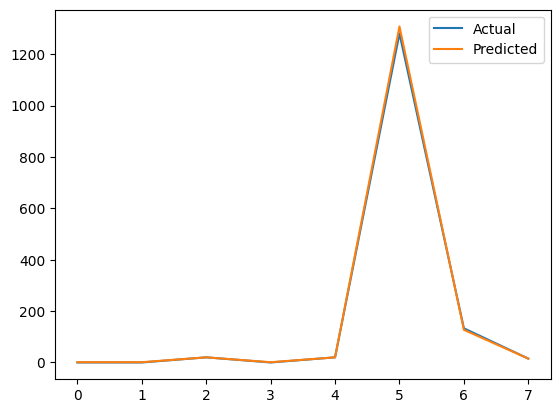

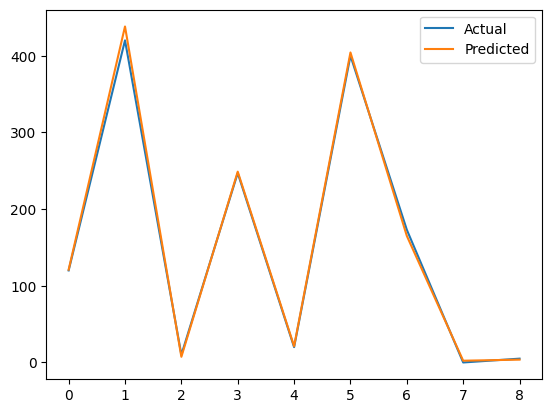

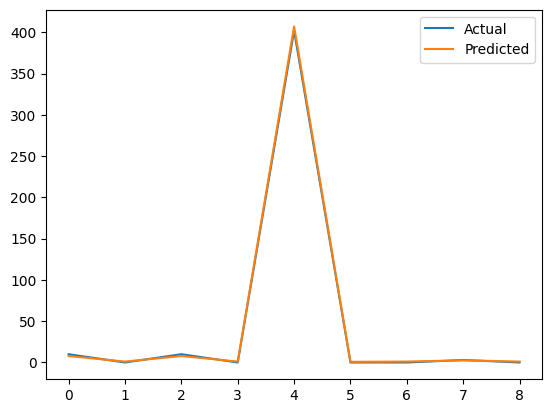

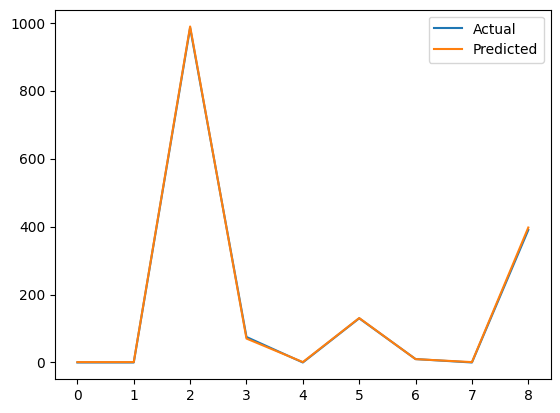

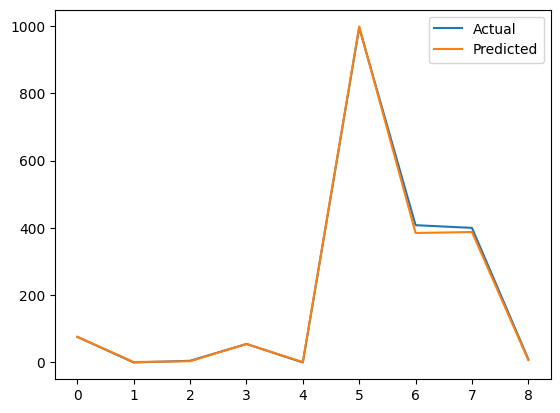

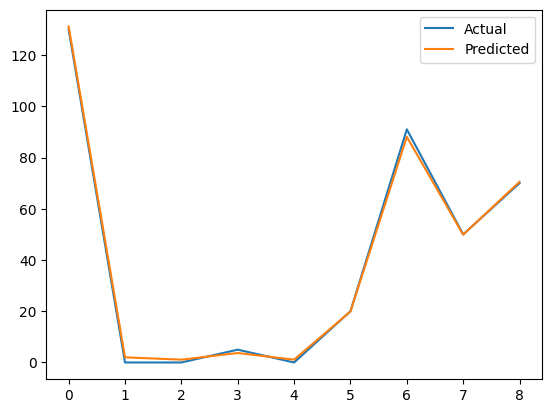

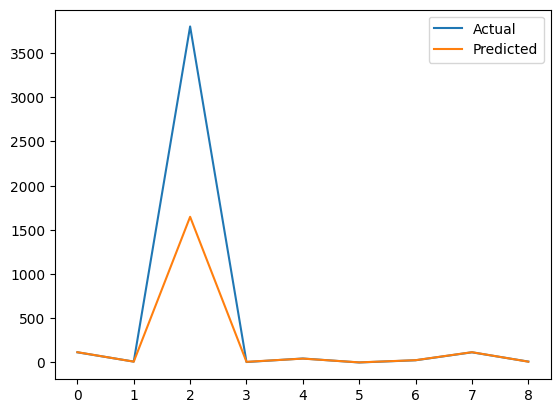

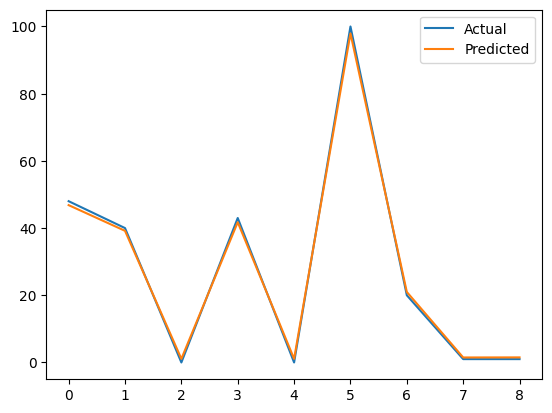

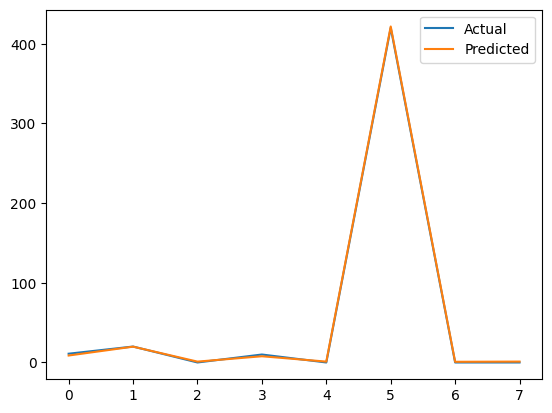

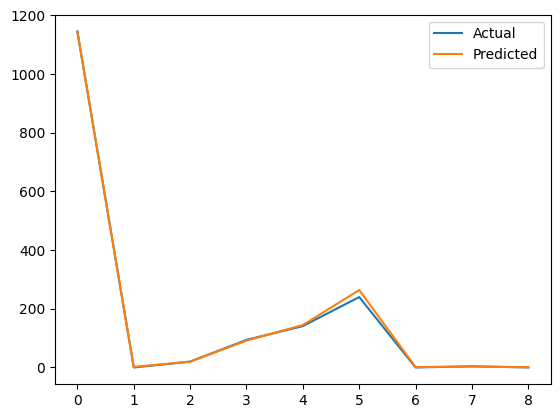

In [39]:
# predict the next 6 months for each city and product class and plot the results
with torch.no_grad():
    j = 0
    for key, value in test_dataloader.items():
        for i, data in enumerate(value):
            data = data.to(device)
            data = data.view(-1, sequence_length, input_size)
            outputs = model(data)
            plt.plot(data[:, -1, :].cpu().numpy().flatten(), label='Actual')
            plt.plot(outputs.cpu().numpy().flatten(), label='Predicted')
            plt.legend()
            plt.show()
        j += 1
        if j == 10:
            break

In [40]:
# save the prediction in a dictionary
predictions = {}
with torch.no_grad():
    for key, value in test_dataloader.items():
        for i, data in enumerate(value):
            data = data.to(device)
            data = data.view(-1, sequence_length, input_size)
            outputs = model(data)
            # add the predictions to the dictionary
            predictions[key] = outputs.cpu().numpy().flatten().tolist()


In [41]:
# crop all the predictions to the same length
min_length = min([len(value) for value in predictions.values()])
for key, value in predictions.items():
    predictions[key] = value[:min_length]
    

In [42]:
# save to a json file
import json
with open('app/predictions.json', 'w') as f:
    json.dump(predictions, f)

FileNotFoundError: [Errno 2] No such file or directory: 'app/predictions.json'